# Detecting the Severity of Parkinson's Disease

Kelvin Basdeo

## Reference

https://archive.ics.uci.edu/dataset/189/parkinsons+telemonitoring

## Introduction

TBD

## Business Problem Statement

TBD

## Goal

TBD

## Exploratory Data Analysis

### Importing Libraries and Loading Data

In [70]:
# imports
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy import stats

from ucimlrepo import fetch_ucirepo

In [71]:
# fetch dataset
pt_data = fetch_ucirepo(id=189)

#
pt_features = pt_data.data.features
pt_target = pt_data.data.targets

print(pt_features.shape, pt_target.shape)

(5875, 19) (5875, 2)


### Dataset Structure and Basic Information

In [72]:
print(f"\nDataset Shape: {pt_features.shape[0]} rows × {pt_features.shape[1]} columns")
print(f"\nColumn Names ({len(pt_features.columns)} total):")
for i, col in enumerate(pt_features.columns, 1):
    print(f"  {i:2d}. {col}")

print("\n--- Data Types ---")
print(pt_features.dtypes)



Dataset Shape: 5875 rows × 19 columns

Column Names (19 total):
   1. age
   2. test_time
   3. Jitter(%)
   4. Jitter(Abs)
   5. Jitter:RAP
   6. Jitter:PPQ5
   7. Jitter:DDP
   8. Shimmer
   9. Shimmer(dB)
  10. Shimmer:APQ3
  11. Shimmer:APQ5
  12. Shimmer:APQ11
  13. Shimmer:DDA
  14. NHR
  15. HNR
  16. RPDE
  17. DFA
  18. PPE
  19. sex

--- Data Types ---
age                int64
test_time        float64
Jitter(%)        float64
Jitter(Abs)      float64
Jitter:RAP       float64
Jitter:PPQ5      float64
Jitter:DDP       float64
Shimmer          float64
Shimmer(dB)      float64
Shimmer:APQ3     float64
Shimmer:APQ5     float64
Shimmer:APQ11    float64
Shimmer:DDA      float64
NHR              float64
HNR              float64
RPDE             float64
DFA              float64
PPE              float64
sex                int64
dtype: object


### Feature Description

- Age: Age of Participant
- test_time: Length of time in seconds of voice recording
- Jitter(%): Average percentage variation in pitch between consecutive voice cycles
- Jitter(Abs): The absolute difference in pitch frequency between cycles
- Jitter:RAP: The average pitch variation between each cycle and its two nearest neighbors
- Jitter:PPQ5: Average variation in pitch over five consecutive cycles
- Jitter:DDP: RAP multiplied by 3 which emphasizes short-term pitch irregularity
- Shimmer: Absolute difference in amplitude between consecutive cycles
- Shimmer(dB): Shimmer expressed in decibels
- Shimmer:APQ3: Average amplitude variation over 3 consecutive cycles
- Shimmer:APQ5: Average amplitude variation over 5 consecutive cycles
- Shimmer:APQ11: Average amplitude variation over 11 cycles - focuses on global amplitude
- Shimmer:DDA: APQ3 times 3 which emphasizes short-term loudness variation
- NHR: Amount of noise energy relative to harmonic energy in the signal
- HNR: Inverse of NHR representing the strength of the harmonic components
- RPDE: Measures how unpredictable the vocal fold vibrations are
- DFA: Assesses the fractal scaling of the voice signal
- PPE: A nonlinear measure of pitch variability
- sex: Gender of patient

### Data - First Look

In [73]:
print("\n" + "="*80)
print("2. DATA PREVIEW")
print("="*80)

print("\n--- First 5 Rows ---")
print(pt_features.head())

print("\n--- Last 5 Rows ---")
print(pt_features.tail())

print("\n--- Random Sample (5 rows) ---")
print(pt_features.sample(5, random_state=42))


2. DATA PREVIEW

--- First 5 Rows ---
   age  test_time  Jitter(%)  Jitter(Abs)  Jitter:RAP  Jitter:PPQ5  \
0   72     5.6431    0.00662     0.000034     0.00401      0.00317   
1   72    12.6660    0.00300     0.000017     0.00132      0.00150   
2   72    19.6810    0.00481     0.000025     0.00205      0.00208   
3   72    25.6470    0.00528     0.000027     0.00191      0.00264   
4   72    33.6420    0.00335     0.000020     0.00093      0.00130   

   Jitter:DDP  Shimmer  Shimmer(dB)  Shimmer:APQ3  Shimmer:APQ5  \
0     0.01204  0.02565        0.230       0.01438       0.01309   
1     0.00395  0.02024        0.179       0.00994       0.01072   
2     0.00616  0.01675        0.181       0.00734       0.00844   
3     0.00573  0.02309        0.327       0.01106       0.01265   
4     0.00278  0.01703        0.176       0.00679       0.00929   

   Shimmer:APQ11  Shimmer:DDA       NHR     HNR     RPDE      DFA      PPE  \
0        0.01662      0.04314  0.014290  21.640  0.41888  0

### Missing Value Analysis

In [74]:
print("\n" + "="*80)
print("MISSING VALUES ANALYSIS")
print("="*80)

missing_count = pt_features.isnull().sum()
missing_percent = (pt_features.isnull().sum() / len(pt_features)) * 100

missing_df = pd.DataFrame({
    'Column': pt_features.columns,
    'Missing_Count': missing_count.values,
    'Missing_Percent': missing_percent.values
})

missing_df = missing_df[missing_df['Missing_Count'] > 0].sort_values('Missing_Count', ascending=False)

if len(missing_df) > 0:
    print("\n--- Columns with Missing Values ---")
    print(missing_df.to_string(index=False))

    # Visualize missing values
    plt.figure(figsize=(12, 6))
    plt.bar(missing_df['Column'], missing_df['Missing_Percent'], color='salmon')
    plt.xlabel('Column', fontsize=12)
    plt.ylabel('Missing Percentage (%)', fontsize=12)
    plt.title('Missing Values by Column', fontsize=14, fontweight='bold')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.savefig('missing_values.png', dpi=300, bbox_inches='tight')
    plt.show()
else:
    print("\nNo missing values found in the dataset!")


MISSING VALUES ANALYSIS

No missing values found in the dataset!


### Statistical Summary

In [75]:
print("\n" + "="*80)
print("STATISTICAL SUMMARY")
print("="*80)

print("\n--- Descriptive Statistics (Numerical Variables) ---")
print(pt_features.describe())

print("\n--- Additional Statistics ---")
stats_df = pd.DataFrame({
    'Column': pt_features.select_dtypes(include=[np.number]).columns,
    'Mean': pt_features.select_dtypes(include=[np.number]).mean().values,
    'Median': pt_features.select_dtypes(include=[np.number]).median().values,
    'Std': pt_features.select_dtypes(include=[np.number]).std().values,
    'Skewness': pt_features.select_dtypes(include=[np.number]).skew().values,
    'Kurtosis': pt_features.select_dtypes(include=[np.number]).kurtosis().values
})
print(stats_df.to_string(index=False))


STATISTICAL SUMMARY

--- Descriptive Statistics (Numerical Variables) ---
               age    test_time    Jitter(%)  Jitter(Abs)   Jitter:RAP  \
count  5875.000000  5875.000000  5875.000000  5875.000000  5875.000000   
mean     64.804936    92.863722     0.006154     0.000044     0.002987   
std       8.821524    53.445602     0.005624     0.000036     0.003124   
min      36.000000    -4.262500     0.000830     0.000002     0.000330   
25%      58.000000    46.847500     0.003580     0.000022     0.001580   
50%      65.000000    91.523000     0.004900     0.000034     0.002250   
75%      72.000000   138.445000     0.006800     0.000053     0.003290   
max      85.000000   215.490000     0.099990     0.000446     0.057540   

       Jitter:PPQ5   Jitter:DDP      Shimmer  Shimmer(dB)  Shimmer:APQ3  \
count  5875.000000  5875.000000  5875.000000  5875.000000   5875.000000   
mean      0.003277     0.008962     0.034035     0.310960      0.017156   
std       0.003732     0.009371  

### Data Types and Unique Values

In [76]:
print("\n" + "="*80)
print("DATA TYPES AND UNIQUE VALUES")
print("="*80)

print("\n--- Unique Value Counts ---")
for col in pt_features.columns:
    unique_count = pt_features[col].nunique()
    print(f"{col:20s}: {unique_count:6d} unique values")

# Check for categorical variables
print("\n--- Potential Categorical Variables (≤20 unique values) ---")
categorical_cols = [col for col in pt_features.columns if pt_features[col].nunique() <= 20]
for col in categorical_cols:
    print(f"\n{col}:")
    print(pt_features[col].value_counts().sort_index())


DATA TYPES AND UNIQUE VALUES

--- Unique Value Counts ---
age                 :     23 unique values
test_time           :   2442 unique values
Jitter(%)           :   1305 unique values
Jitter(Abs)         :   1326 unique values
Jitter:RAP          :    853 unique values
Jitter:PPQ5         :    840 unique values
Jitter:DDP          :   1703 unique values
Shimmer             :   3581 unique values
Shimmer(dB)         :    852 unique values
Shimmer:APQ3        :   2664 unique values
Shimmer:APQ5        :   2850 unique values
Shimmer:APQ11       :   3283 unique values
Shimmer:DDA         :   4223 unique values
NHR                 :   5532 unique values
HNR                 :   4780 unique values
RPDE                :   5430 unique values
DFA                 :   5282 unique values
PPE                 :   4777 unique values
sex                 :      2 unique values

--- Potential Categorical Variables (≤20 unique values) ---

sex:
sex
0    4008
1    1867
Name: count, dtype: int64


### Distribution Analysis


DISTRIBUTION ANALYSIS


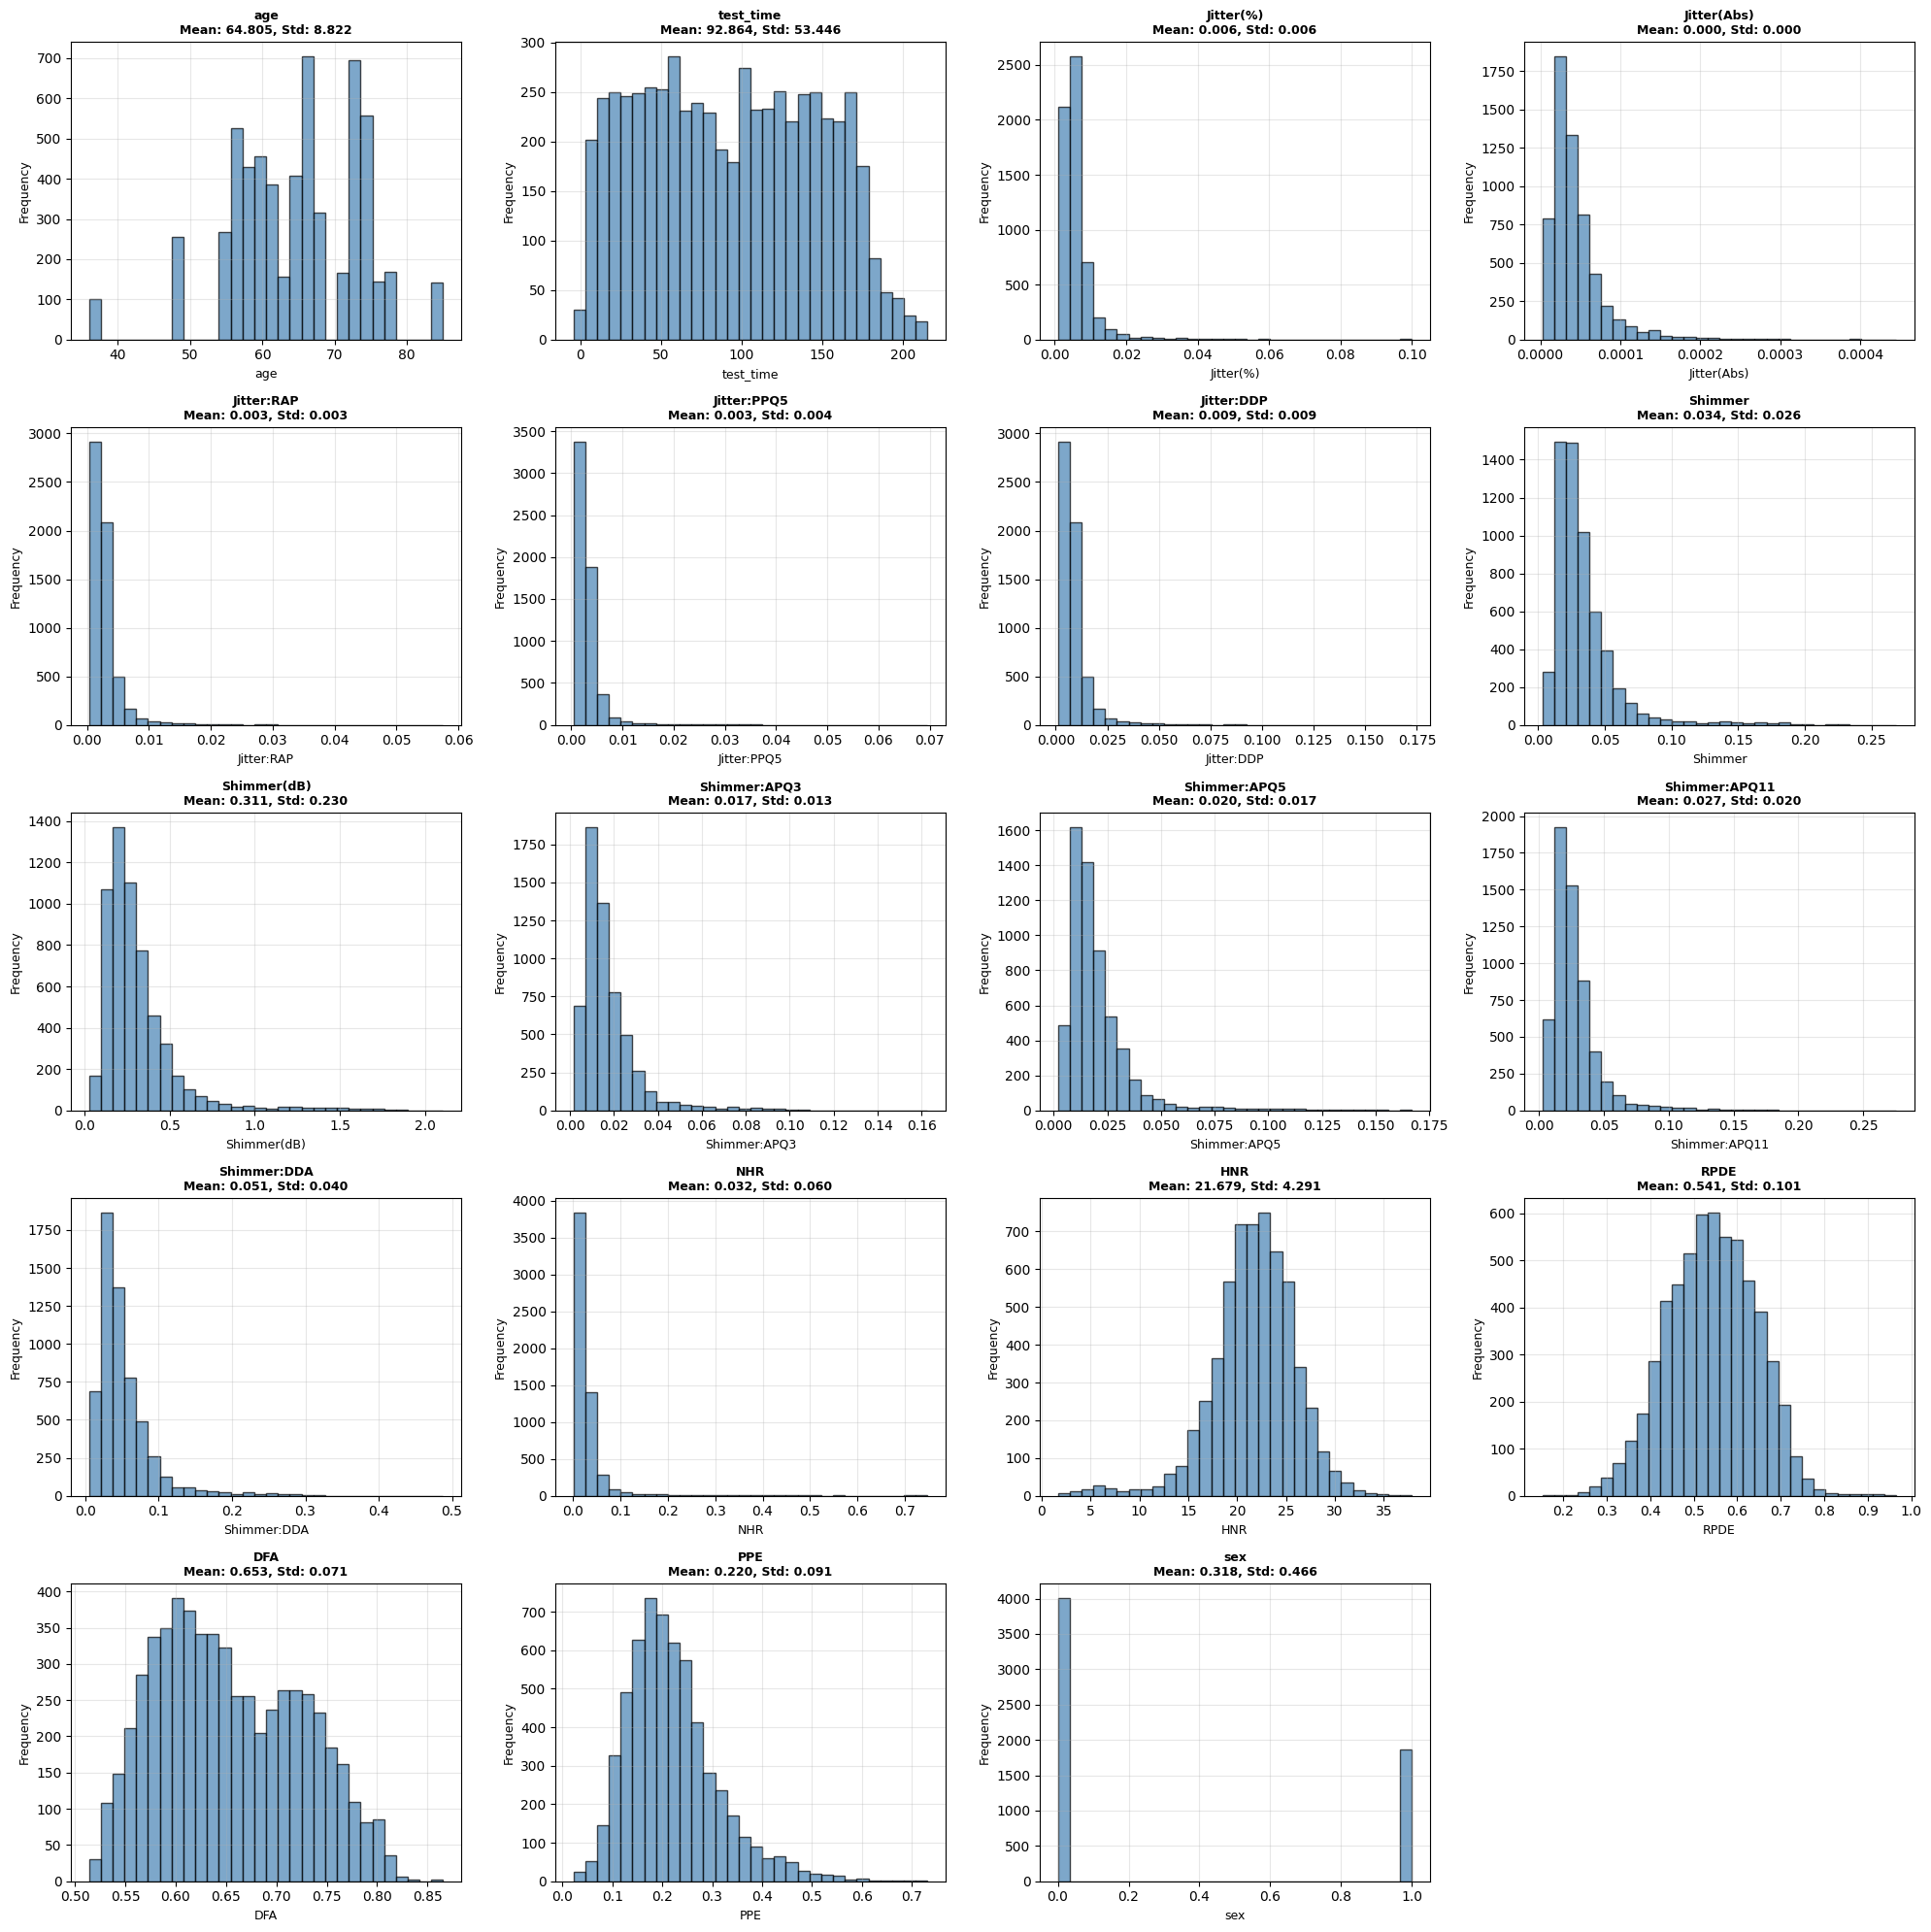


Distribution plots saved for 19 numerical variables


In [77]:
print("\n" + "="*80)
print("DISTRIBUTION ANALYSIS")
print("="*80)

# Get numerical columns
numerical_cols = pt_features.select_dtypes(include=[np.number]).columns.tolist()

# Plot distributions for all numerical variables
n_cols = len(numerical_cols)
n_rows = (n_cols + 3) // 4  # 4 plots per row
fig, axes = plt.subplots(n_rows, 4, figsize=(20, n_rows * 4))
axes = axes.flatten() if n_rows > 1 else [axes]

for idx, col in enumerate(numerical_cols):
    if idx < len(axes):
        axes[idx].hist(pt_features[col].dropna(), bins=30, color='steelblue', edgecolor='black', alpha=0.7)
        axes[idx].set_xlabel(col, fontsize=9)
        axes[idx].set_ylabel('Frequency', fontsize=9)
        axes[idx].set_title(f'{col}\nMean: {pt_features[col].mean():.3f}, Std: {pt_features[col].std():.3f}',
                           fontsize=9, fontweight='bold')
        axes[idx].grid(True, alpha=0.3)

# Hide extra subplots
for idx in range(len(numerical_cols), len(axes)):
    axes[idx].axis('off')

plt.tight_layout()
plt.savefig('distributions_all.png', dpi=300, bbox_inches='tight')
plt.show()

print(f"\nDistribution plots saved for {len(numerical_cols)} numerical variables")

### Outlier Detection


OUTLIER DETECTION (Using IQR Method)

--- Variables with Outliers ---
       Column  Outlier_Count  Outlier_Percent  Lower_Bound  Upper_Bound
          NHR            436         7.421277    -0.019807     0.062225
  Jitter:PPQ5            425         7.234043    -0.000640     0.005920
   Jitter:RAP            414         7.046809    -0.000985     0.005855
   Jitter:DDP            413         7.029787    -0.002980     0.017580
    Jitter(%)            398         6.774468    -0.001250     0.011630
  Jitter(Abs)            366         6.229787    -0.000024     0.000100
      Shimmer            333         5.668085    -0.011825     0.070695
  Shimmer(dB)            332         5.651064    -0.110000     0.650000
 Shimmer:APQ3            332         5.651064    -0.007663     0.037518
  Shimmer:DDA            331         5.634043    -0.023027     0.112592
 Shimmer:APQ5            314         5.344681    -0.008658     0.043202
Shimmer:APQ11            314         5.344681    -0.009910     0.

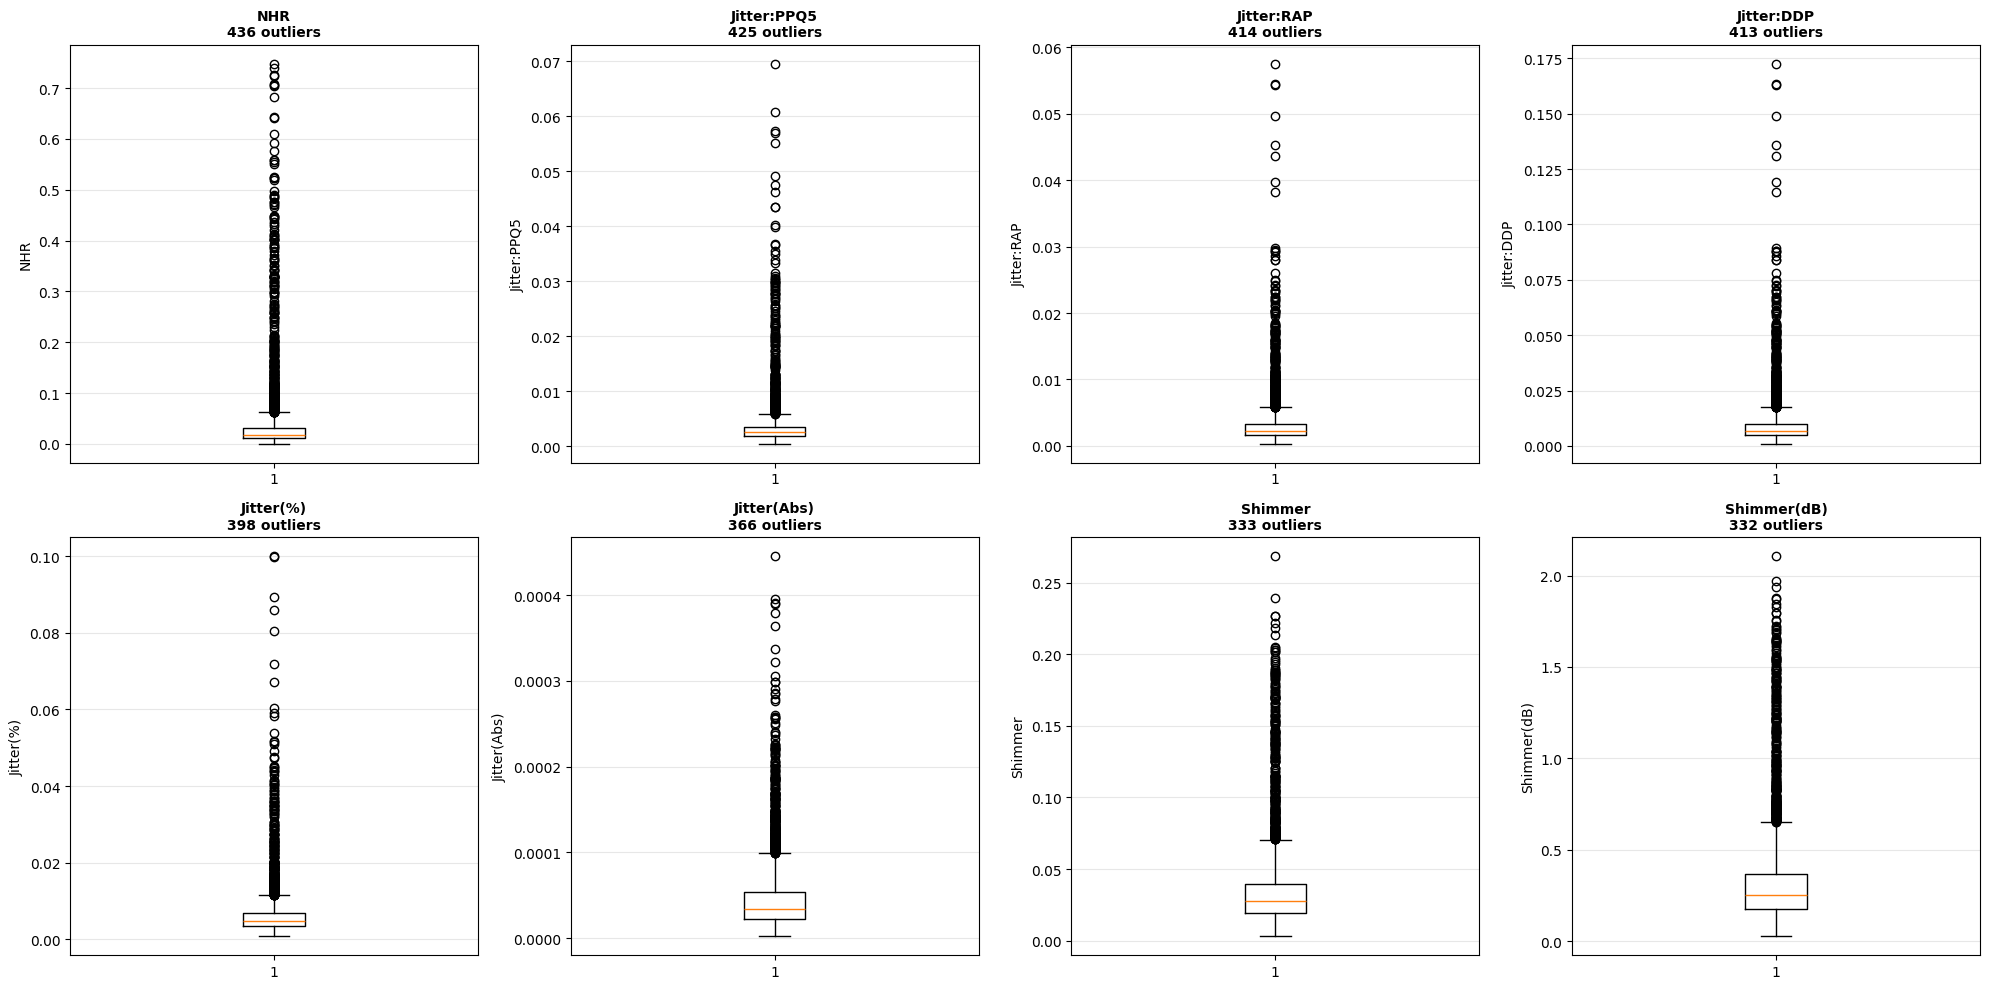

In [78]:
print("\n" + "="*80)
print("OUTLIER DETECTION (Using IQR Method)")
print("="*80)

outlier_summary = []

for col in numerical_cols:
    Q1 = pt_features[col].quantile(0.25)
    Q3 = pt_features[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = pt_features[(pt_features[col] < lower_bound) | (pt_features[col] > upper_bound)]
    outlier_count = len(outliers)
    outlier_percent = (outlier_count / len(pt_features)) * 100

    outlier_summary.append({
        'Column': col,
        'Outlier_Count': outlier_count,
        'Outlier_Percent': outlier_percent,
        'Lower_Bound': lower_bound,
        'Upper_Bound': upper_bound
    })

outlier_df = pd.DataFrame(outlier_summary)
outlier_df = outlier_df[outlier_df['Outlier_Count'] > 0].sort_values('Outlier_Count', ascending=False)

if len(outlier_df) > 0:
    print("\n--- Variables with Outliers ---")
    print(outlier_df.to_string(index=False))
else:
    print("\nNo outliers detected using IQR method")

# Box plots for variables with most outliers
if len(outlier_df) > 0:
    top_outlier_cols = outlier_df.head(8)['Column'].tolist()

    fig, axes = plt.subplots(2, 4, figsize=(20, 10))
    axes = axes.flatten()

    for idx, col in enumerate(top_outlier_cols):
        if idx < len(axes):
            axes[idx].boxplot(pt_features[col].dropna(), vert=True)
            axes[idx].set_ylabel(col, fontsize=10)
            axes[idx].set_title(f'{col}\n{outlier_df[outlier_df["Column"]==col]["Outlier_Count"].values[0]} outliers',
                               fontsize=10, fontweight='bold')
            axes[idx].grid(True, alpha=0.3, axis='y')

    for idx in range(len(top_outlier_cols), len(axes)):
        axes[idx].axis('off')

    plt.tight_layout()
    plt.savefig('outliers_boxplots.png', dpi=300, bbox_inches='tight')
    plt.show()


### Correlation Analysis


CORRELATION ANALYSIS

--- Highly Correlated Variable Pairs (|r| > 0.7) ---
   Variable_1    Variable_2  Correlation
 Shimmer:APQ3   Shimmer:DDA     1.000000
   Jitter:RAP    Jitter:DDP     1.000000
      Shimmer   Shimmer(dB)     0.992334
      Shimmer  Shimmer:APQ5     0.984904
    Jitter(%)    Jitter:DDP     0.984184
    Jitter(%)    Jitter:RAP     0.984181
      Shimmer  Shimmer:APQ3     0.979828
      Shimmer   Shimmer:DDA     0.979827
  Shimmer(dB)  Shimmer:APQ5     0.976373
    Jitter(%)   Jitter:PPQ5     0.968214
  Shimmer(dB)  Shimmer:APQ3     0.968015
  Shimmer(dB)   Shimmer:DDA     0.968014
 Shimmer:APQ5   Shimmer:DDA     0.962723
 Shimmer:APQ3  Shimmer:APQ5     0.962723
  Jitter:PPQ5    Jitter:DDP     0.947203
   Jitter:RAP   Jitter:PPQ5     0.947196
 Shimmer:APQ5 Shimmer:APQ11     0.938935
  Shimmer(dB) Shimmer:APQ11     0.936338
      Shimmer Shimmer:APQ11     0.935457
 Shimmer:APQ3 Shimmer:APQ11     0.885695
Shimmer:APQ11   Shimmer:DDA     0.885694
    Jitter(%)   Jitter

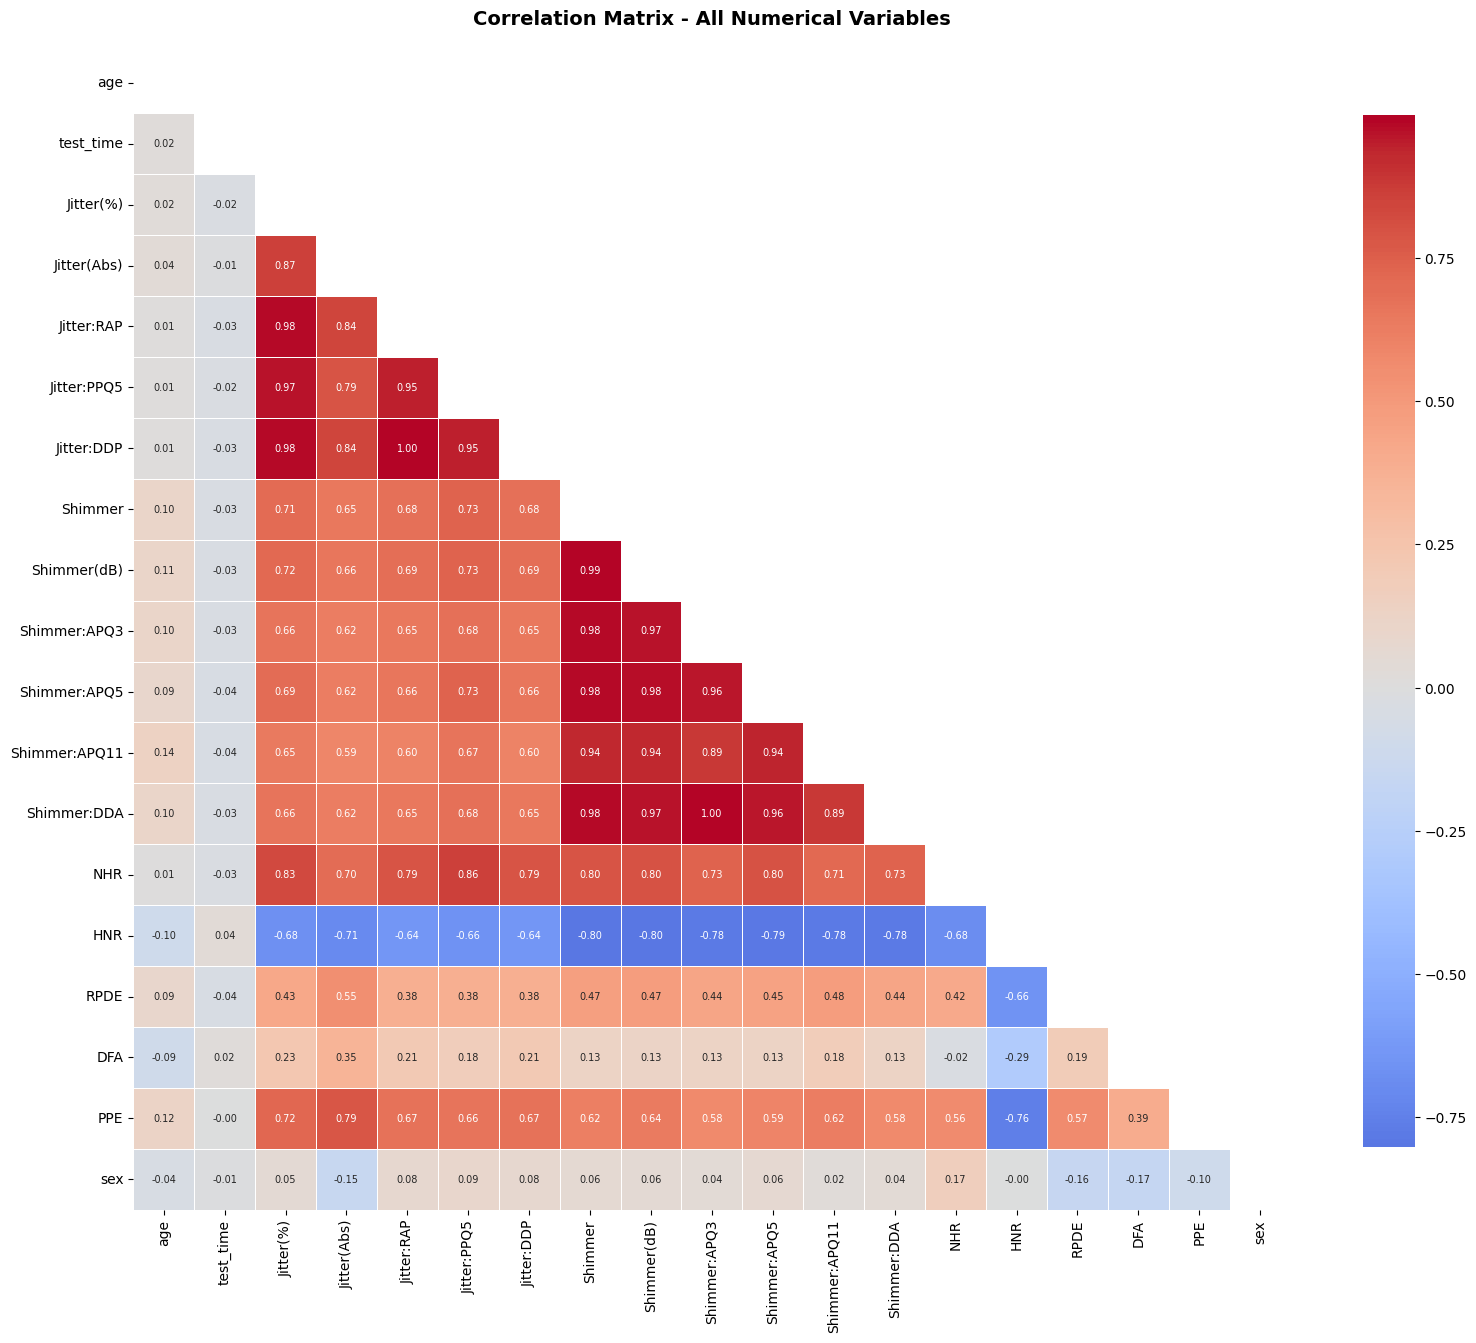

In [79]:
print("\n" + "="*80)
print("CORRELATION ANALYSIS")
print("="*80)

# Calculate correlation matrix
corr_matrix = pt_features[numerical_cols].corr()

# Find highly correlated pairs
high_corr_pairs = []
for i in range(len(corr_matrix.columns)):
    for j in range(i+1, len(corr_matrix.columns)):
        if abs(corr_matrix.iloc[i, j]) > 0.7:  # Threshold: 0.7
            high_corr_pairs.append({
                'Variable_1': corr_matrix.columns[i],
                'Variable_2': corr_matrix.columns[j],
                'Correlation': corr_matrix.iloc[i, j]
            })

if high_corr_pairs:
    high_corr_df = pd.DataFrame(high_corr_pairs).sort_values('Correlation',
                                                               key=abs,
                                                               ascending=False)
    print("\n--- Highly Correlated Variable Pairs (|r| > 0.7) ---")
    print(high_corr_df.to_string(index=False))
else:
    print("\n✓ No highly correlated pairs found (threshold: |r| > 0.7)")

# Correlation heatmap
plt.figure(figsize=(16, 14))
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
sns.heatmap(corr_matrix, mask=mask, annot=True, fmt='.2f', cmap='coolwarm',
            center=0, square=True, linewidths=0.5, cbar_kws={"shrink": 0.8},
            annot_kws={'size': 7})
plt.title('Correlation Matrix - All Numerical Variables', fontsize=14, fontweight='bold', pad=20)
plt.tight_layout()
plt.savefig('correlation_heatmap_full.png', dpi=300, bbox_inches='tight')
plt.show()


### Pairwise Relationships


PAIRWISE RELATIONSHIPS

Generating pairplot for variables: age, test_time, Jitter(%), Jitter(Abs), Jitter:RAP, Jitter:PPQ5


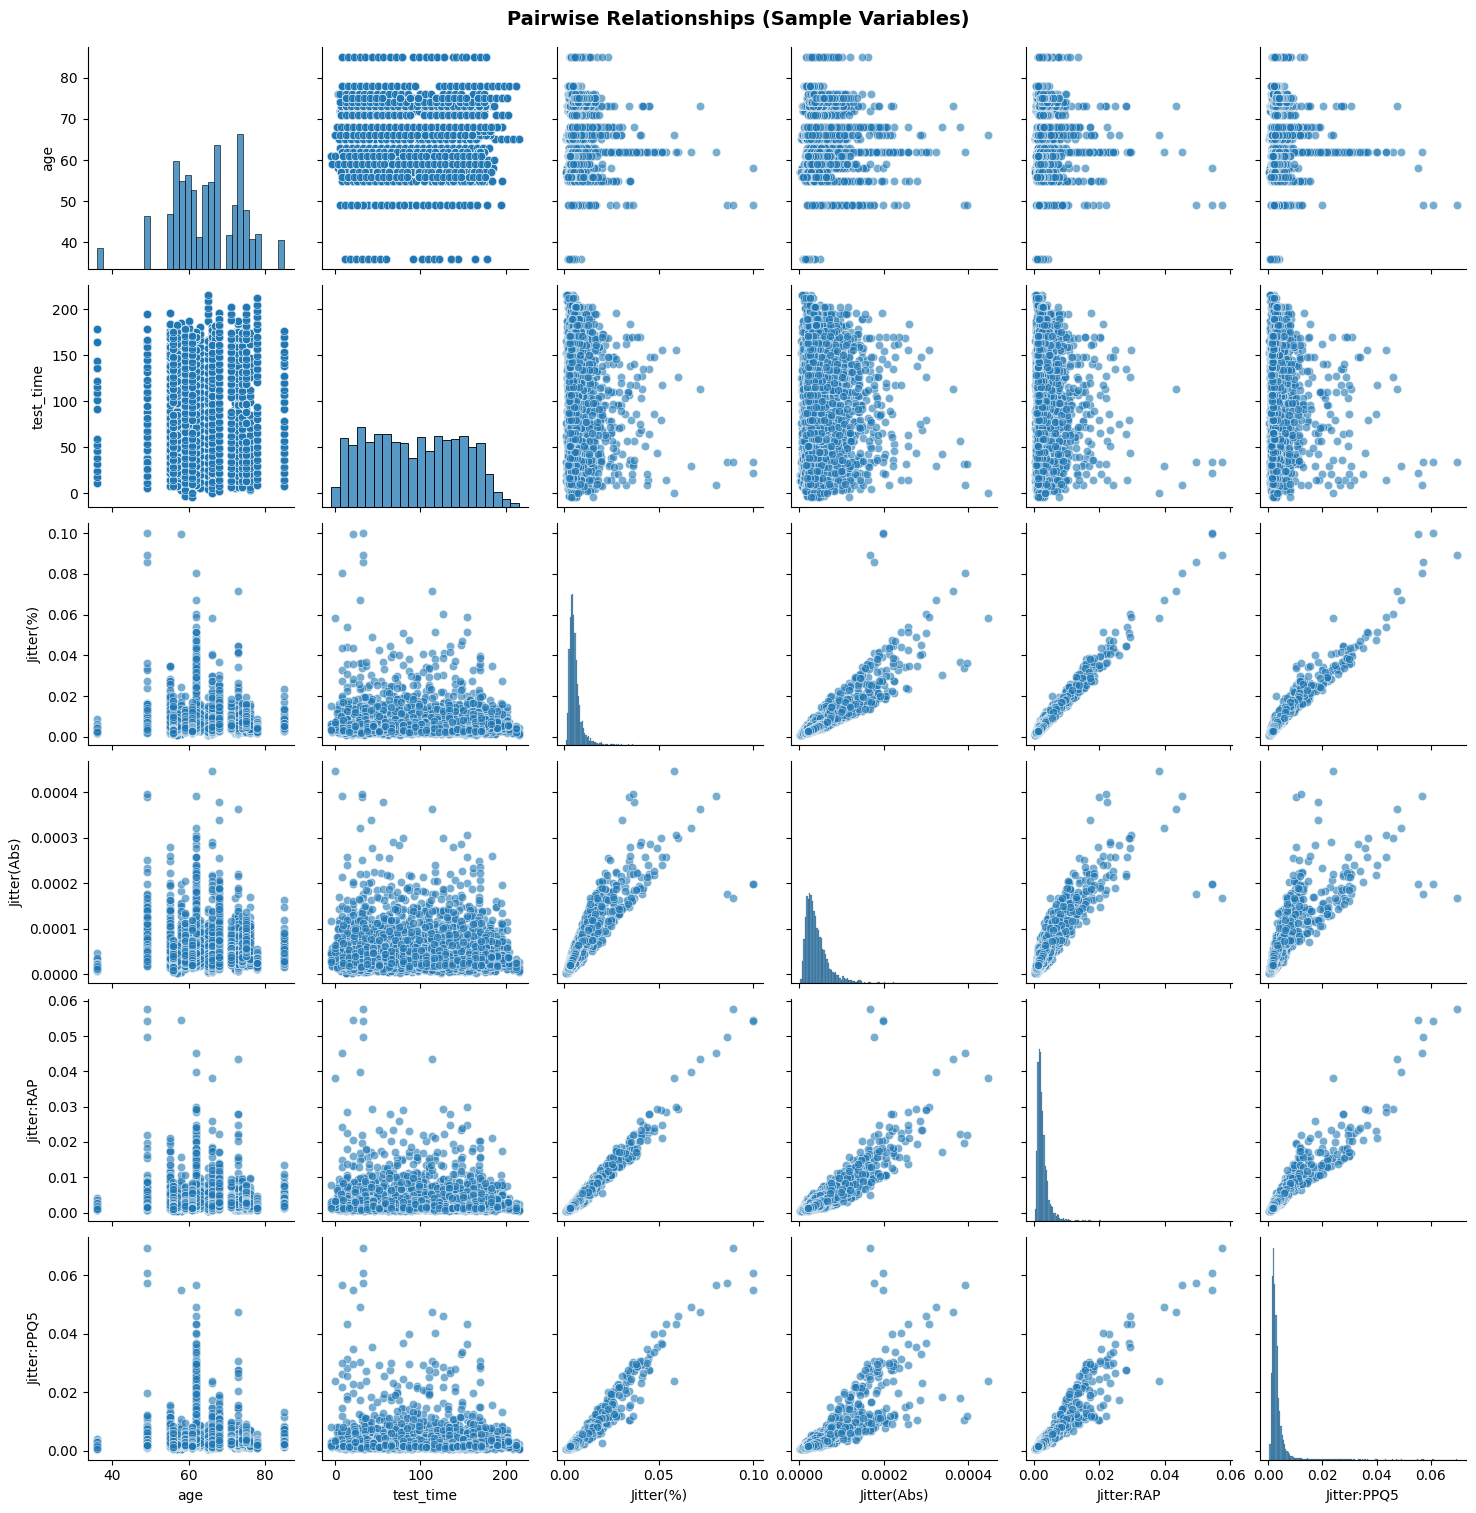

Pairplot generated for sample variables


In [80]:
print("\n" + "="*80)
print("PAIRWISE RELATIONSHIPS")
print("="*80)

# Select a subset of variables for pairplot (to avoid overcrowding)
# Choose first 6 numerical columns as example
sample_cols = numerical_cols[:6]

print(f"\nGenerating pairplot for variables: {', '.join(sample_cols)}")

pairplot_fig = sns.pairplot(pt_features[sample_cols], diag_kind='hist', plot_kws={'alpha': 0.6})
pairplot_fig.fig.suptitle('Pairwise Relationships (Sample Variables)',
                          y=1.01, fontsize=14, fontweight='bold')
plt.savefig('pairplot_sample.png', dpi=300, bbox_inches='tight')
plt.show()

print("Pairplot generated for sample variables")

### Skewness and Normality


SKEWNESS AND NORMALITY TESTS

--- Skewness and Normality Test Results ---
(Skewness: -0.5 to 0.5 = fairly symmetric, |s| > 1 = highly skewed)
       Column  Skewness  Kurtosis
          age -0.379133  0.670455
    test_time  0.077720 -1.147377
    Jitter(%)  6.451846 67.496559
  Jitter(Abs)  3.283006 18.155509
   Jitter:RAP  6.945438 78.534581
  Jitter:PPQ5  7.586205 81.566374
   Jitter:DDP  6.945376 78.532426
      Shimmer  3.312793 15.240156
  Shimmer(dB)  3.099221 13.091042
 Shimmer:APQ3  3.097223 14.724563
 Shimmer:APQ5  3.698061 19.244339
Shimmer:APQ11  3.406958 19.160187
  Shimmer:DDA  3.097224 14.724600
          NHR  6.549123 52.606172
          HNR -0.812057  2.505159
         RPDE -0.037434 -0.065036
          DFA  0.282078 -0.880246
          PPE  1.090819  1.951793
          sex  0.782873 -1.387582


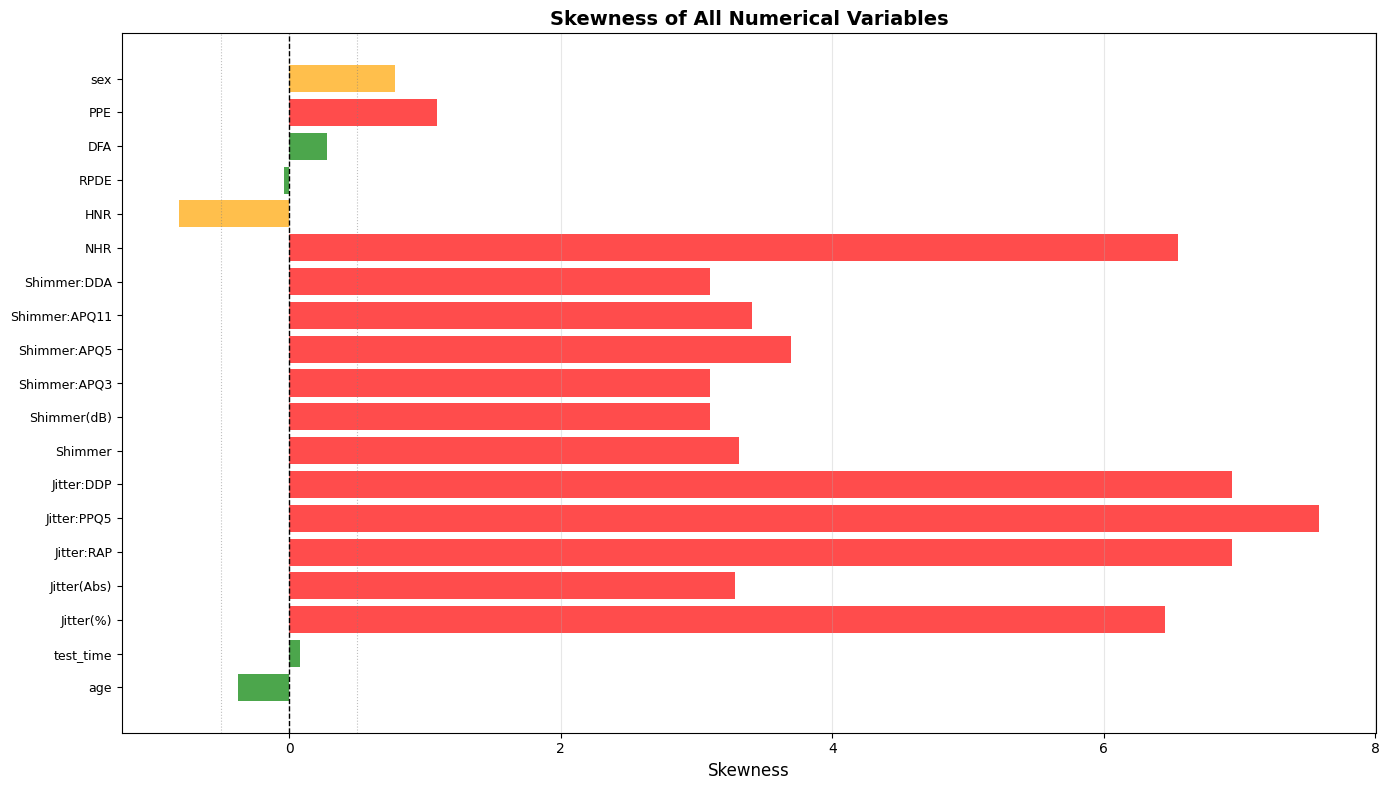

In [81]:
print("\n" + "="*80)
print("SKEWNESS AND NORMALITY TESTS")
print("="*80)

normality_results = []

for col in numerical_cols:
    skewness = pt_features[col].skew()
    kurtosis = pt_features[col].kurtosis()

    normality_results.append({
        'Column': col,
        'Skewness': skewness,
        'Kurtosis': kurtosis,
    })

normality_df = pd.DataFrame(normality_results)

print("\n--- Skewness and Normality Test Results ---")
print("(Skewness: -0.5 to 0.5 = fairly symmetric, |s| > 1 = highly skewed)")
print(normality_df.to_string(index=False))

# Visualize skewness
fig, ax = plt.subplots(figsize=(14, 8))
colors = ['red' if abs(x) > 1 else 'orange' if abs(x) > 0.5 else 'green'
          for x in normality_df['Skewness']]
ax.barh(range(len(normality_df)), normality_df['Skewness'], color=colors, alpha=0.7)
ax.set_yticks(range(len(normality_df)))
ax.set_yticklabels(normality_df['Column'], fontsize=9)
ax.set_xlabel('Skewness', fontsize=12)
ax.set_title('Skewness of All Numerical Variables', fontsize=14, fontweight='bold')
ax.axvline(x=0, color='black', linestyle='--', linewidth=1)
ax.axvline(x=-0.5, color='gray', linestyle=':', linewidth=0.8, alpha=0.5)
ax.axvline(x=0.5, color='gray', linestyle=':', linewidth=0.8, alpha=0.5)
ax.grid(True, alpha=0.3, axis='x')
plt.tight_layout()
plt.savefig('skewness_analysis.png', dpi=300, bbox_inches='tight')
plt.show()


### Summary Statistics by Groups

In [82]:
print("\n" + "="*80)
print("GROUPED ANALYSIS")
print("="*80)

if categorical_cols:
    for cat_col in categorical_cols[:3]:  # Analyze first 3 categorical variables
        print(f"\n--- Summary Statistics by {cat_col} ---")
        grouped = pt_features.groupby(cat_col)[numerical_cols[:5]].mean()  # First 5 numerical columns
        print(grouped)
else:
    print("\nNo categorical variables found for grouping analysis")



GROUPED ANALYSIS

--- Summary Statistics by sex ---
           age  test_time  Jitter(%)  Jitter(Abs)  Jitter:RAP
sex                                                          
0    65.055389  93.221349   0.005956     0.000048    0.002824
1    64.267274  92.095983   0.006577     0.000036    0.003338


### Data Quality

In [83]:
print("\n" + "="*80)
print("12. DATA QUALITY SUMMARY")
print("="*80)

print(f"\n{'Metric':<30s} {'Value':<20s}")
print("-" * 50)
print(f"{'Total Rows':<30s} {len(pt_features):<20,}")
print(f"{'Total Columns':<30s} {len(pt_features.columns):<20,}")
print(f"{'Numerical Columns':<30s} {len(numerical_cols):<20,}")
print(f"{'Categorical Columns':<30s} {len(categorical_cols):<20,}")
print(f"{'Total Missing Values':<30s} {pt_features.isnull().sum().sum():<20,}")
print(f"{'Missing Value %':<30s} {(pt_features.isnull().sum().sum() / (len(pt_features) * len(pt_features.columns)) * 100):<20.2f}%")
print(f"{'Duplicate Rows':<30s} {pt_features.duplicated().sum():<20,}")
print(f"{'Memory Usage':<30s} {pt_features.memory_usage(deep=True).sum() / 1024:.2f} KB")

# Check for duplicate rows
duplicates = pt_features.duplicated().sum()
if duplicates > 0:
    print(f"\n⚠ Warning: {duplicates} duplicate rows found")
    print("\nDuplicate rows:")
    print(pt_features[pt_features.duplicated(keep=False)].sort_values(by=list(pt_features.columns)))
else:
    print("\n✓ No duplicate rows found")


12. DATA QUALITY SUMMARY

Metric                         Value               
--------------------------------------------------
Total Rows                     5,875               
Total Columns                  19                  
Numerical Columns              19                  
Categorical Columns            1                   
Total Missing Values           0                   
Missing Value %                0.00                %
Duplicate Rows                 0                   
Memory Usage                   872.20 KB

✓ No duplicate rows found


### Key Insights

In [84]:
print("\n" + "="*80)
print("KEY INSIGHTS FROM EDA")
print("="*80)

print("\n--- Dataset Overview ---")
print(f"  • Dataset contains {len(pt_features):,} observations across {len(pt_features.columns)} variables")
print(f"  • {len(numerical_cols)} numerical and {len(categorical_cols)} categorical variables")

print("\n--- Data Quality ---")
if pt_features.isnull().sum().sum() == 0:
    print(" No missing values - dataset is complete")
else:
    print(f"{pt_features.isnull().sum().sum()} missing values found across {(pt_features.isnull().sum() > 0).sum()} columns")

if duplicates == 0:
    print("No duplicate rows")
else:
    print(f"  • {duplicates} duplicate rows detected")

print("\n--- Distribution Characteristics ---")
highly_skewed = normality_df[abs(normality_df['Skewness']) > 1]
if len(highly_skewed) > 0:
    print(f"  • {len(highly_skewed)} variables are highly skewed (|skewness| > 1):")
    for col in highly_skewed['Column'].tolist()[:5]:
        print(f"    - {col}")
else:
    print("  • No highly skewed variables detected")

print("\n--- Correlations ---")
if high_corr_pairs:
    print(f"  • {len(high_corr_pairs)} pairs of variables are highly correlated (|r| > 0.7)")
    for pair in high_corr_pairs[:3]:
        print(f"    - {pair['Variable_1']} ↔ {pair['Variable_2']}: r = {pair['Correlation']:.3f}")
else:
    print("  • No highly correlated variable pairs found")

print("\n--- Outliers ---")
if len(outlier_df) > 0:
    total_outliers = outlier_df['Outlier_Count'].sum()
    print(f"  • {total_outliers} outliers detected across {len(outlier_df)} variables")
    print(f"  • Variables with most outliers:")
    for idx, row in outlier_df.head(3).iterrows():
        print(f"    - {row['Column']}: {row['Outlier_Count']} ({row['Outlier_Percent']:.2f}%)")
else:
    print("  • No outliers detected using IQR method")


KEY INSIGHTS FROM EDA

--- Dataset Overview ---
  • Dataset contains 5,875 observations across 19 variables
  • 19 numerical and 1 categorical variables

--- Data Quality ---
 No missing values - dataset is complete
No duplicate rows

--- Distribution Characteristics ---
  • 13 variables are highly skewed (|skewness| > 1):
    - Jitter(%)
    - Jitter(Abs)
    - Jitter:RAP
    - Jitter:PPQ5
    - Jitter:DDP

--- Correlations ---
  • 50 pairs of variables are highly correlated (|r| > 0.7)
    - Jitter(%) ↔ Jitter(Abs): r = 0.866
    - Jitter(%) ↔ Jitter:RAP: r = 0.984
    - Jitter(%) ↔ Jitter:PPQ5: r = 0.968

--- Outliers ---
  • 4912 outliers detected across 16 variables
  • Variables with most outliers:
    - NHR: 436 (7.42%)
    - Jitter:PPQ5: 425 (7.23%)
    - Jitter:RAP: 414 (7.05%)
